In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_survived = pd.read_csv("test.csv")
df_survived.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
df_gender = pd.read_csv("gender_submission.csv")
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

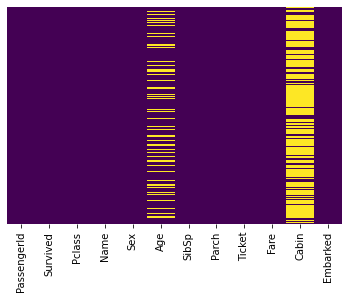

In [40]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [41]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
df.duplicated().value_counts()

False    891
dtype: int64

In [43]:
df['Age'].fillna(df.Age.mean(), inplace = True)

In [44]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
numeric_variables = list(df.dtypes[df.dtypes != 'object'].index)
df[numeric_variables].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


<AxesSubplot:>

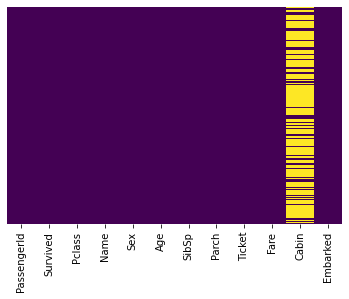

In [46]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [47]:
df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

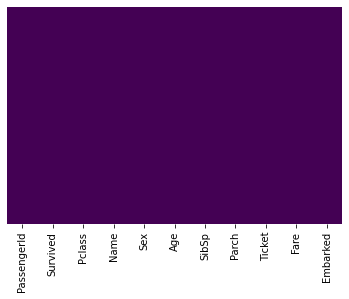

In [48]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [72]:
df2 = df.groupby(['Survived','Pclass'])['Name'].count().reset_index()
df_survived = df2[df2["Survived"] == 1]
df_not_survived = df2[df2["Survived"] == 0]
df_survived

,Survived,Pclass,Name
3,1,1,136
4,1,2,87
5,1,3,119


In [77]:
fig = plt.figure(figsize=(18,10), dpi=1600)
colors = sns.color_palette('pastel')
labels = df_survived['Pclass'].tolist()
ax1 = plt.subplot2grid((2,4),(0,0))
plt.pie(df_not_survived["Name"], colors = colors, autopct='%.0f%%',labels = labels)
plt.title("Passengers who didn't survive")
ax1 = plt.subplot2grid((2, 4), (0, 1))
plt.pie(df_survived["Name"], colors = colors, autopct='%.0f%%', labels = labels)
plt.title('Passengers who survived')
plt.legend(labels, loc='upper left', bbox_to_anchor = (1.05, 0.6))
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

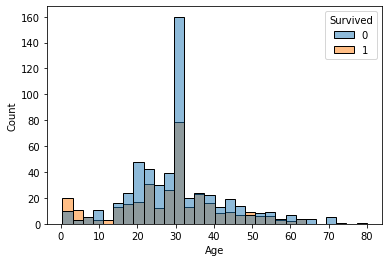

In [79]:
sns.histplot(data = df, x = 'Age', hue = 'Survived')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

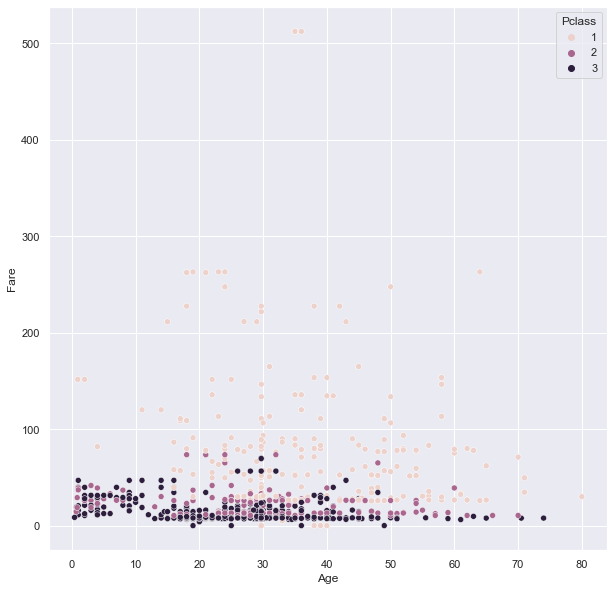

In [84]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.scatterplot(data=df, x='Age', y = 'Fare',hue='Pclass')

<AxesSubplot:xlabel='Survived', ylabel='count'>

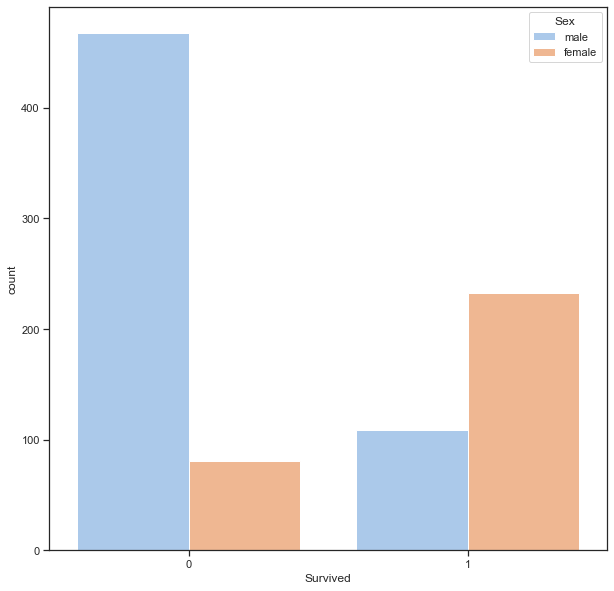

In [88]:
sns.set_style('ticks')
sns.countplot(x='Survived',hue='Sex',data=df,palette='pastel')

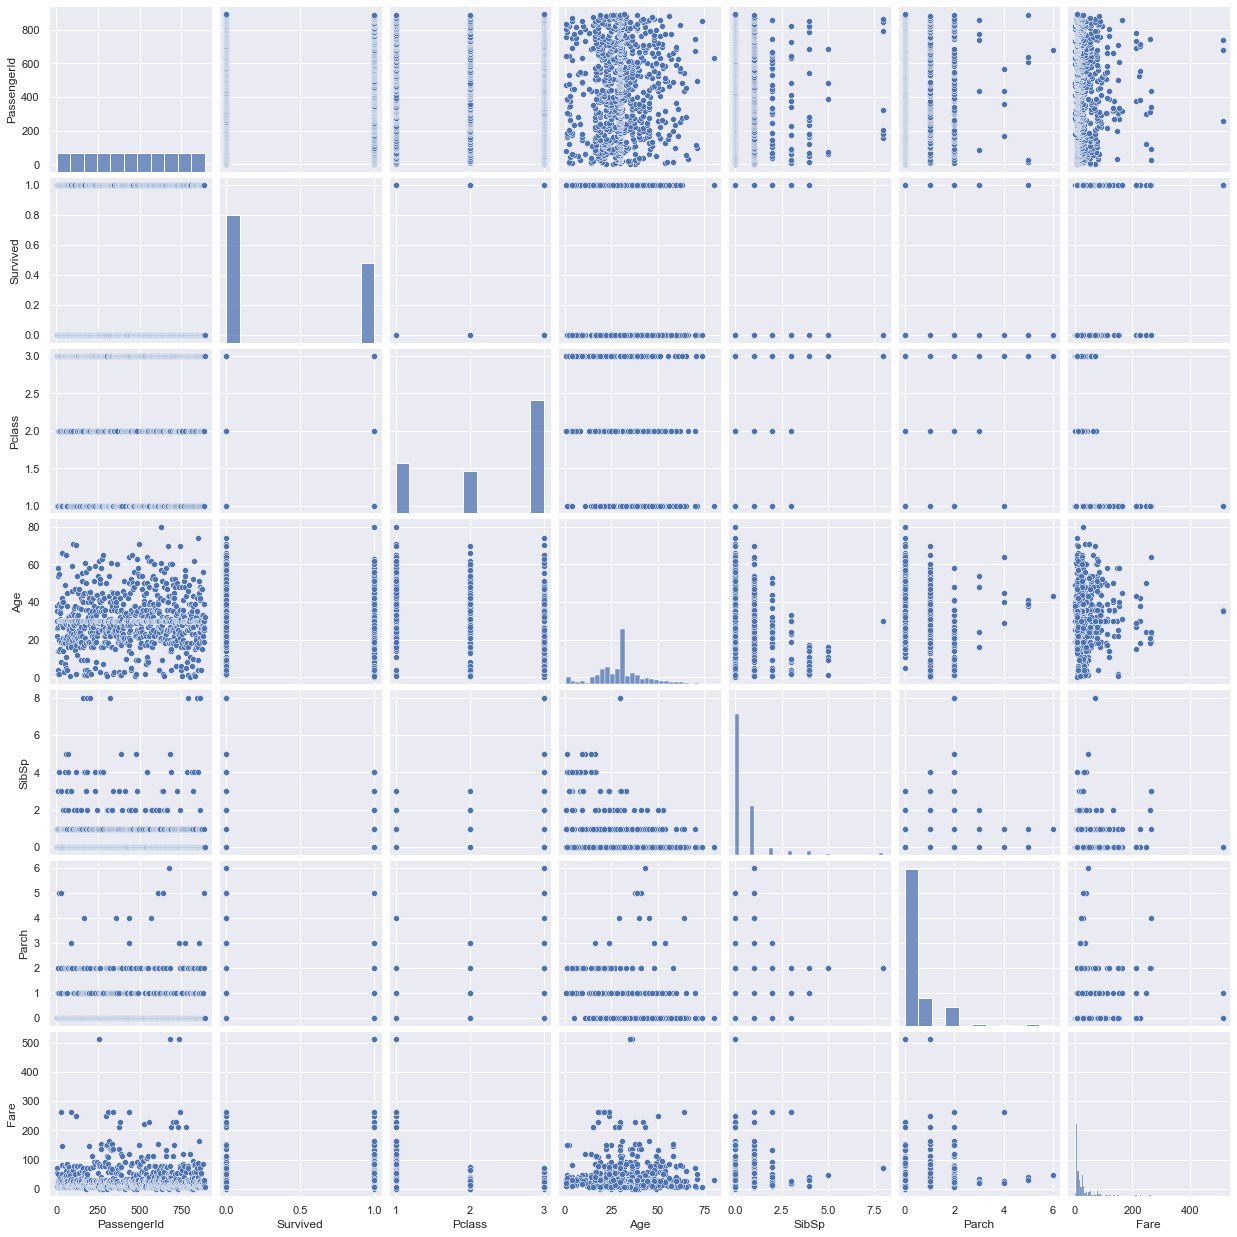

In [89]:
sns.set(rc = {'figure.figsize':(5,20)})
sns.pairplot(df)
plt.show()

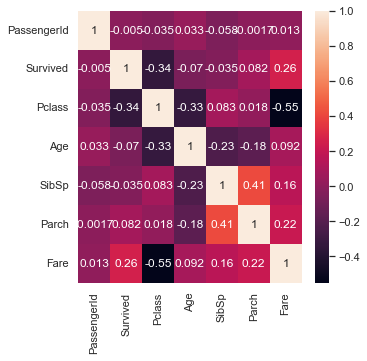

In [90]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(df[['PassengerId', 'Survived', 'Pclass','Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True)
plt.show()

In [11]:
women = df.loc[df['Sex'] == 'female']["Survived"]
rate_survival = sum(women)/len(women)
rate_survival

0.7420382165605095

In [12]:
men = df.loc[df['Sex'] == 'male']['Survived']
rate_survival = sum(men)/len(men)
rate_survival

0.18890814558058924

In [13]:
from sklearn.ensemble import RandomForestClassifier

y = df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df[features])
X_test = pd.get_dummies(df[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
